

#An insight in HR Analytics Data Set

### Komitis Chrysovalantis


<br>
<br>



The scope of the assigment is to dive into the "HR Analytics Data Set" dataset (https://www.kaggle.com/datasets/raminhuseyn/hr-analytics-data-set?select=HR_capstone_dataset.csv)
An analysis will be done to answer questions on three categories based on the existing dataset. The categories are:
1.   Salary
2.   People who left the company
2.   Satisfaction

Some categories my overlap eachother.


First the necessary libraries and dataset will be loaded

#Import the dataset

In [ ]:
%matplotlib inline

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/MscAidl/Aidl_03/Final Exercice/hr analytics/HR_capstone_dataset.csv')

#Data Exploration

**About the data**

The dataset is about HR data. It consist 10 columns, 6 of them are int64, 2 of the are float64 and the other 2 are objects. It has 15000 entries and none of them are null. It does not contain personal characteristics, like age or sex and focused general characterisrics of an employ.

In [ ]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
data.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


From a first dive into the data we can take that is an ok, not good not bad, company based on the mean satisfaction that has good employs based on the mean evaluation. The 75% of them works on 3 or more projects and and this is reflected in the average hours which is more than 5*8 per week. The mean tenure of teh company is 3 and a half years and almost the 25% has of the employs have left the company. Also we can see a 14% accidents between the employs, we can not know for sure if this is too high because we need date data, but we can assume that thsi company does not give promotions, only 2% of them took one in the last 5 years.

In [ ]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
data['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

From a first look a t the count plots, the 1/3 of the company for the sales department, followed by the technical and the support. The most of the works on low or medium salary and only about 1000 of them works on high salary, that justifieswhy the mean tenure is 3.5 years.

<Axes: xlabel='Department', ylabel='count'>

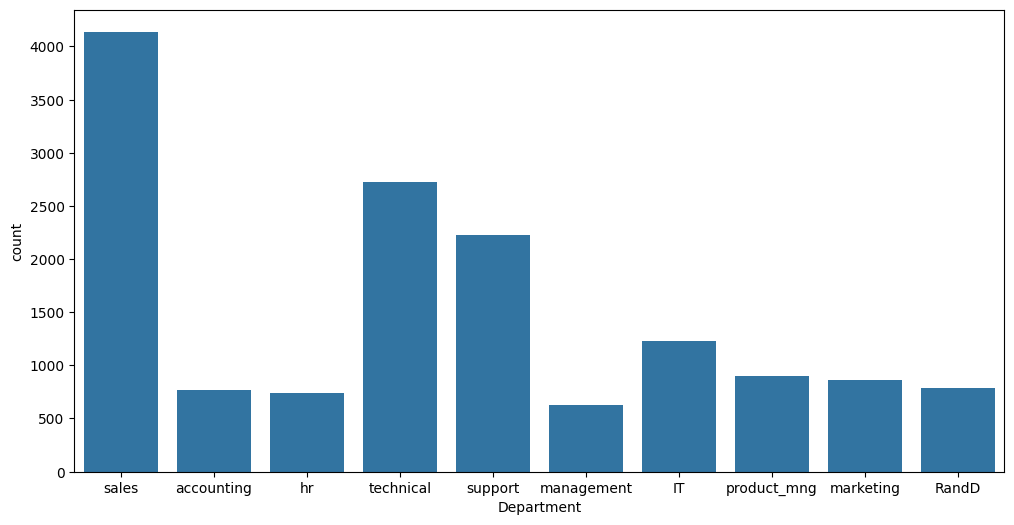

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Department",  data=data)

<Axes: xlabel='salary', ylabel='count'>

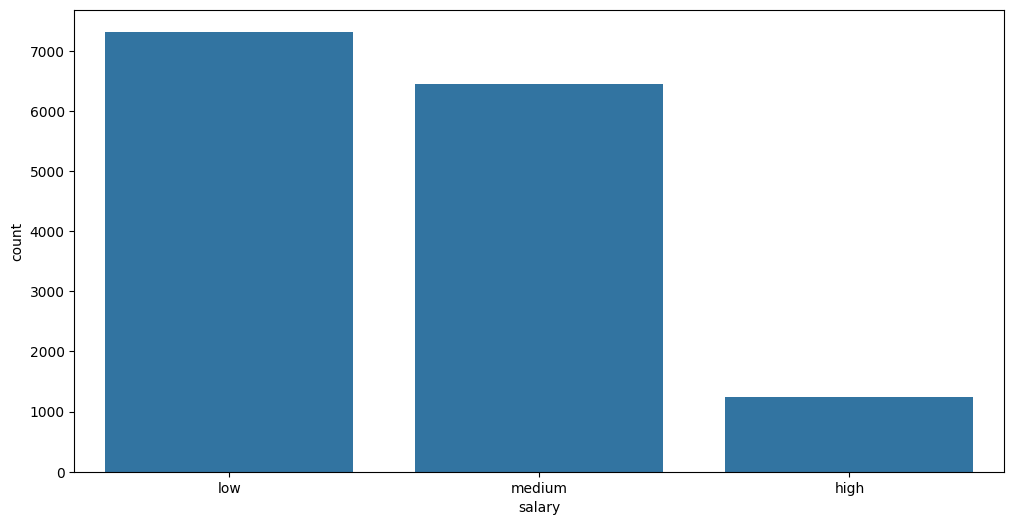

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x="salary",  data=data)

array([[<Axes: title={'center': 'satisfaction_level'}>,
        <Axes: title={'center': 'last_evaluation'}>,
        <Axes: title={'center': 'number_project'}>],
       [<Axes: title={'center': 'average_montly_hours'}>,
        <Axes: title={'center': 'time_spend_company'}>,
        <Axes: title={'center': 'Work_accident'}>],
       [<Axes: title={'center': 'left'}>,
        <Axes: title={'center': 'promotion_last_5years'}>, <Axes: >]],
      dtype=object)

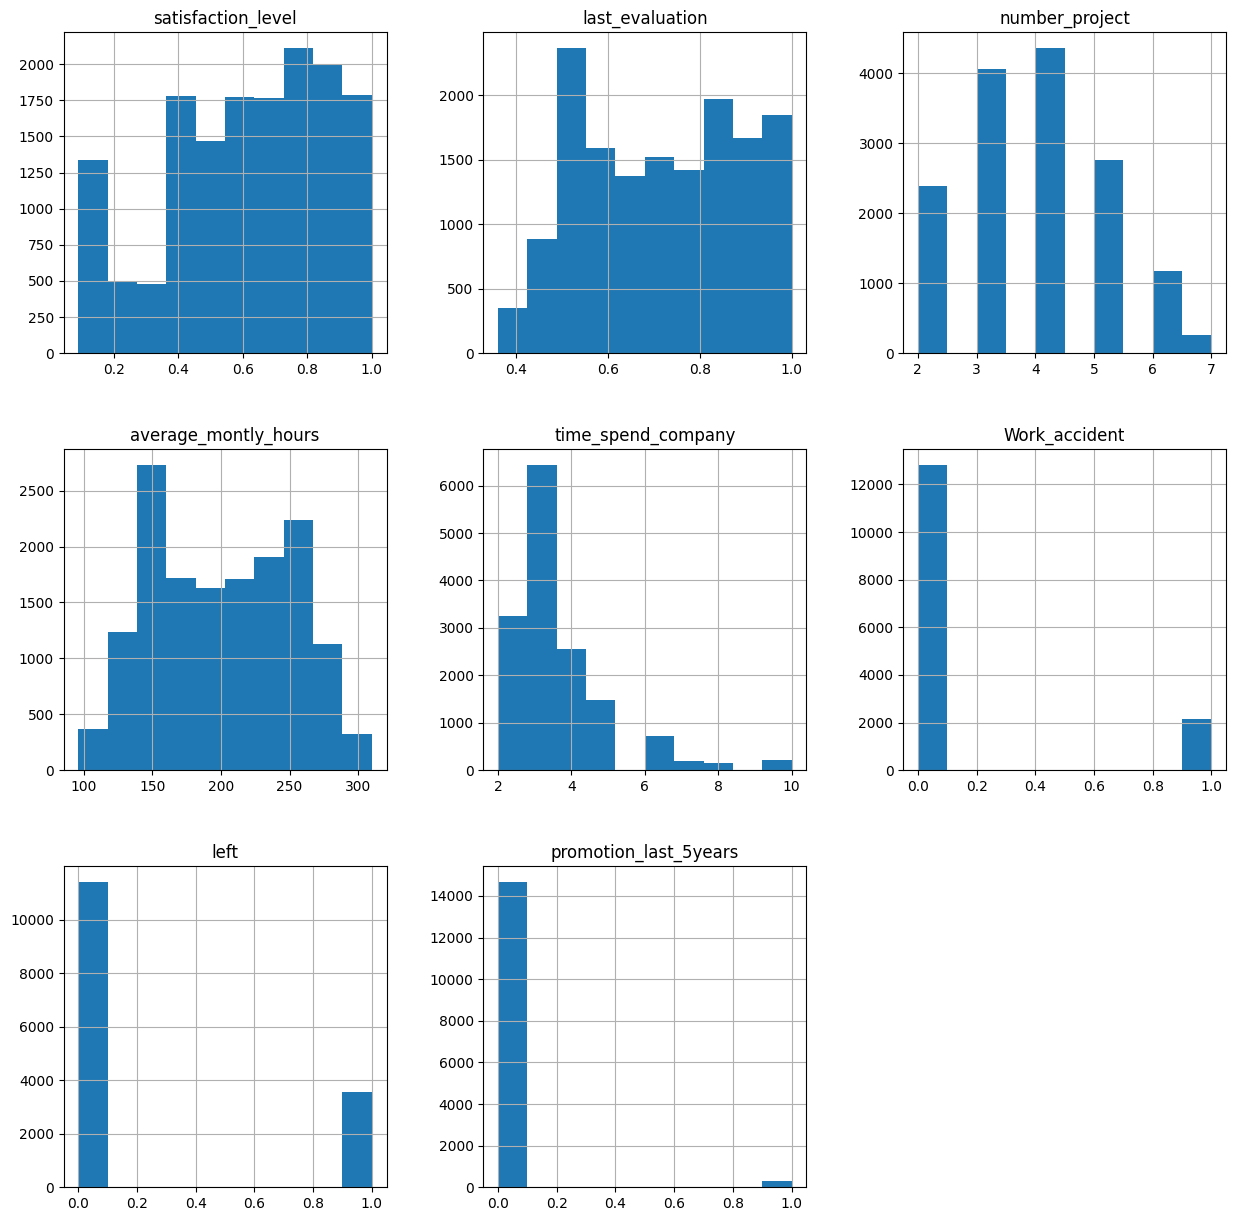

In [ ]:
data.hist(figsize=(15, 15))

#1 Questions about salary

Whats the percentage of salary categories of each department?

Even though the management department has the least employs they have the biggest percentage of high salary with 35% in total. The department with the less paying employs is the support, that's make sense because the support roles often are junior roles. In the overall the other departments follows a patern of 48-45-7 % of low-medium-high salary.

In [ ]:
df_grouped = data.groupby(['Department', 'salary']).size().unstack(fill_value=0)
df_grouped = df_grouped[['low', 'medium', 'high']]

df_percentage = pd.DataFrame(df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100)
df_percentage

salary,low,medium,high
Department,,,
IT,49.633252,43.602282,6.764466
RandD,46.251588,47.268107,6.480305
accounting,46.675359,43.676662,9.647979
hr,45.331529,48.579161,6.089310
management,28.571429,35.714286,35.714286
marketing,46.853147,43.822844,9.324009
product_mng,50.000000,42.461197,7.538803
sales,50.700483,42.801932,6.497585
support,51.413190,42.261104,6.325707


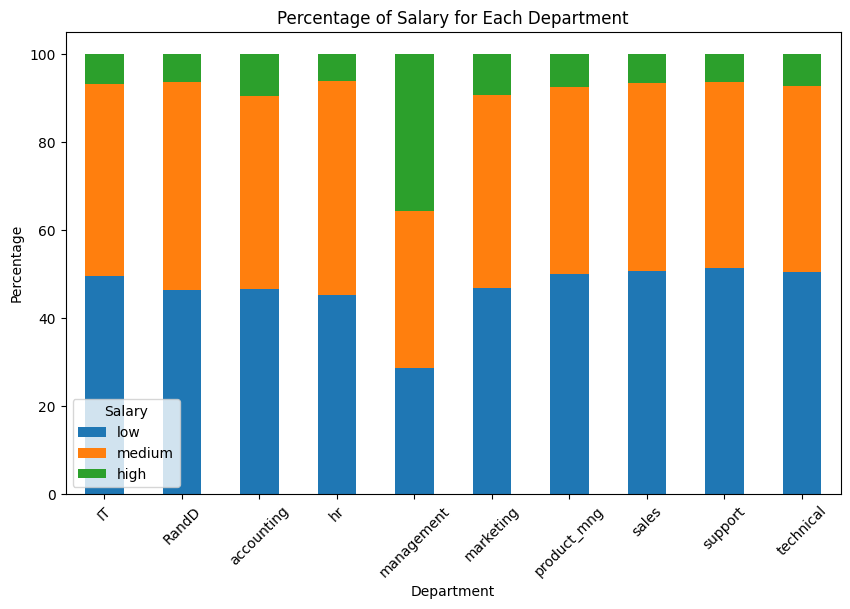

In [ ]:
df_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Percentage of Salary for Each Department')
plt.xlabel('Department')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Salary')
plt.show()

Checking in the box plot of working hour for every salary category, most of the categories are close, but we can see that the distrubution are wider and gets narrowest from low to high salary.

Text(0.5, 1.0, 'Working hours distribution among salary')

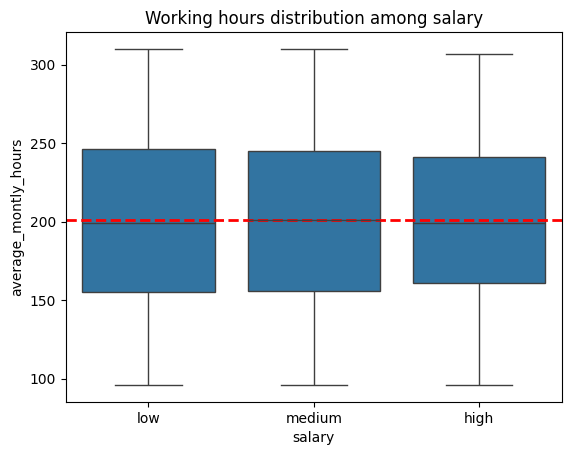

In [ ]:
sns.boxplot(x=data.salary, y=data.average_montly_hours)
plt.axhline(data.average_montly_hours.mean(),color='r',linestyle='dashed',linewidth=2)
plt.title('Working hours distribution among salary')

The satisfaction lavel among the salary categories shows that the employs for had medium or high salary tends to be happier. Overal the mean of each category is higher the the general mean. The distribution is wider on the lowest salary category here as well.

Text(0.5, 1.0, 'satisfaction distribution among salary')

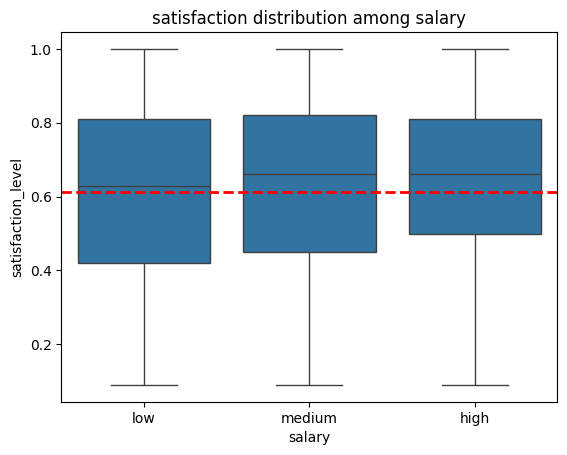

In [ ]:
sns.boxplot(x=data.salary, y=data.satisfaction_level)
plt.axhline(data.satisfaction_level.mean(),color='r',linestyle='dashed',linewidth=2)
plt.title('satisfaction distribution among salary')

As we see above the most of the employs works on 3 or 4 projects. with the exception of the 3 projects the other categories follows the patern that we saw above in the countplot of the salary.

Text(0.5, 1.0, 'Nunmber of project among salary')

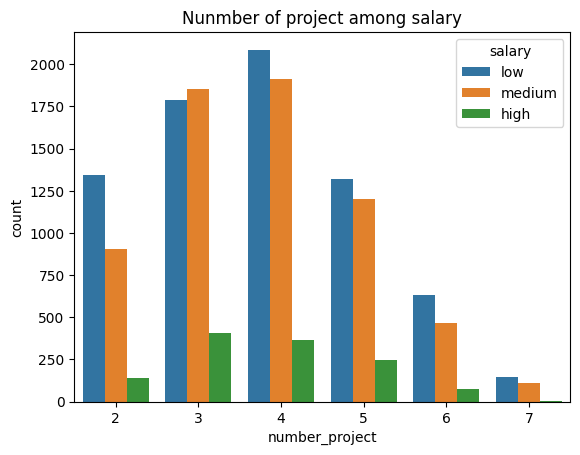

In [ ]:
sns.countplot(x="number_project", hue='salary', data=data)
plt.title('Nunmber of project among salary')

Looking at the violin plot for satisfaction distribution among the salary categories along with with those who got promoted or not we can assume that those who got a promotion but NOT jump to a medium salary are not so satisfied than the ones that did not take a promotion. We can assume that the duties after the promotion are more and do not reflect the salary. On the other had those who got a promotion on the other 2 categories tends to be happier.
Also we can se that there is a highest probability for someone to not be happy if the is no promotion.

At the evaluation violin plot we can see that the people from low salary category who got a promotion tends to has lowest evaluation from the ones who did not took a promotion, that follows the assumption we make above.

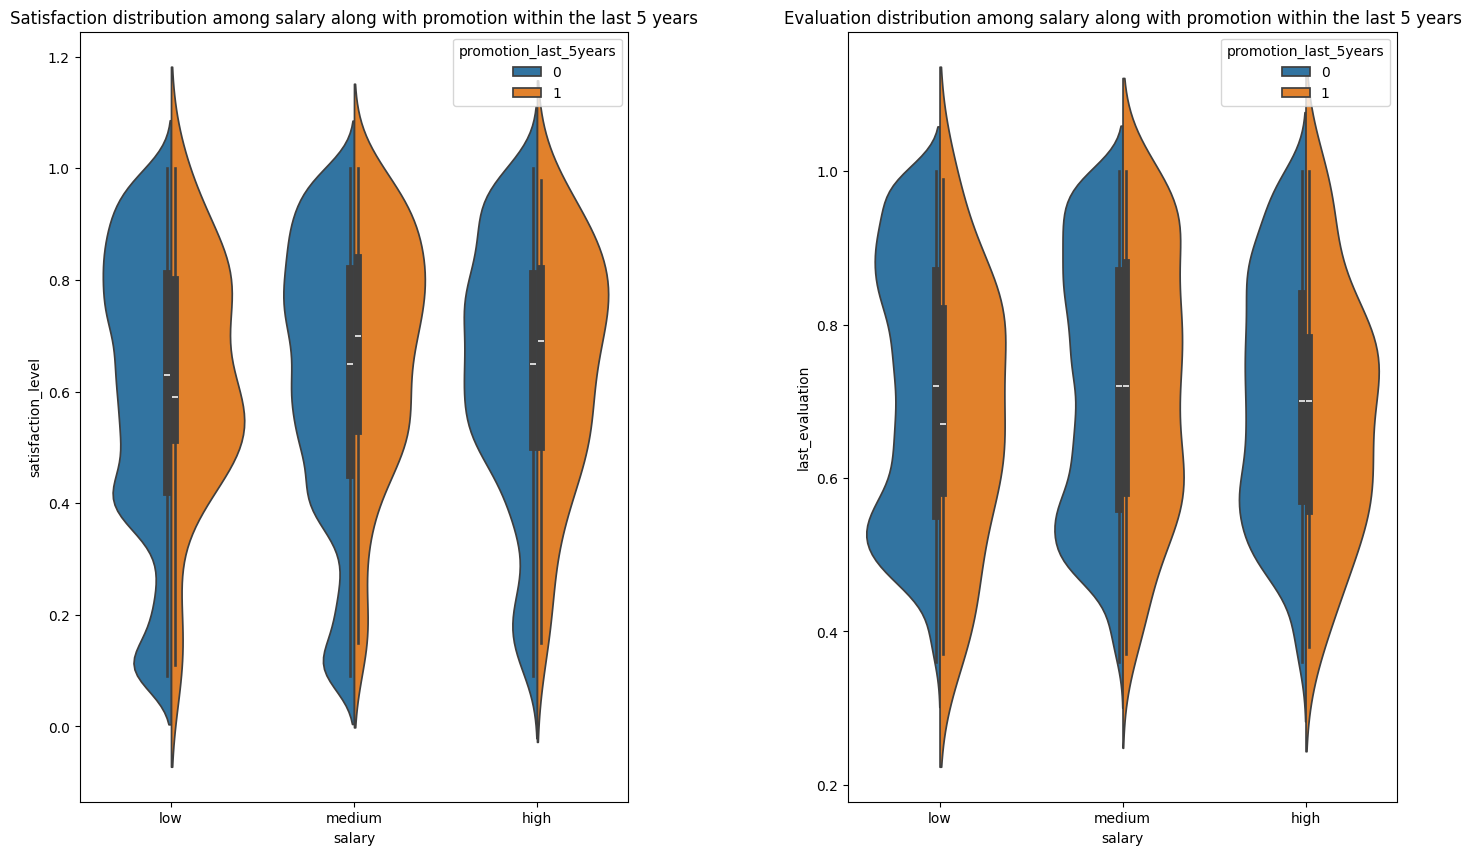

In [ ]:
plt.figure(figsize=(17, 10))

plt.subplot(121)
sns.violinplot(x="salary",y="satisfaction_level", hue="promotion_last_5years", data=data,split=True)
plt.title('Satisfaction distribution among salary along with promotion within the last 5 years')
plt.subplot(122)
sns.violinplot(x="salary",y="last_evaluation", hue="promotion_last_5years", data=data,split=True)
plt.title('Evaluation distribution among salary along with promotion within the last 5 years')
plt.subplots_adjust(wspace=0.4,hspace=0.7) #set the distances between subplots

#2 Questions about leaving the company

Checking the analysis about teh ones who left we can see most of them left the company after 3 years, and based on the count plot of people from every department we can see that this categories follows this. Most of the are from the sales technical and support.

[Text(0.5, 1.0, 'Years spend in company')]

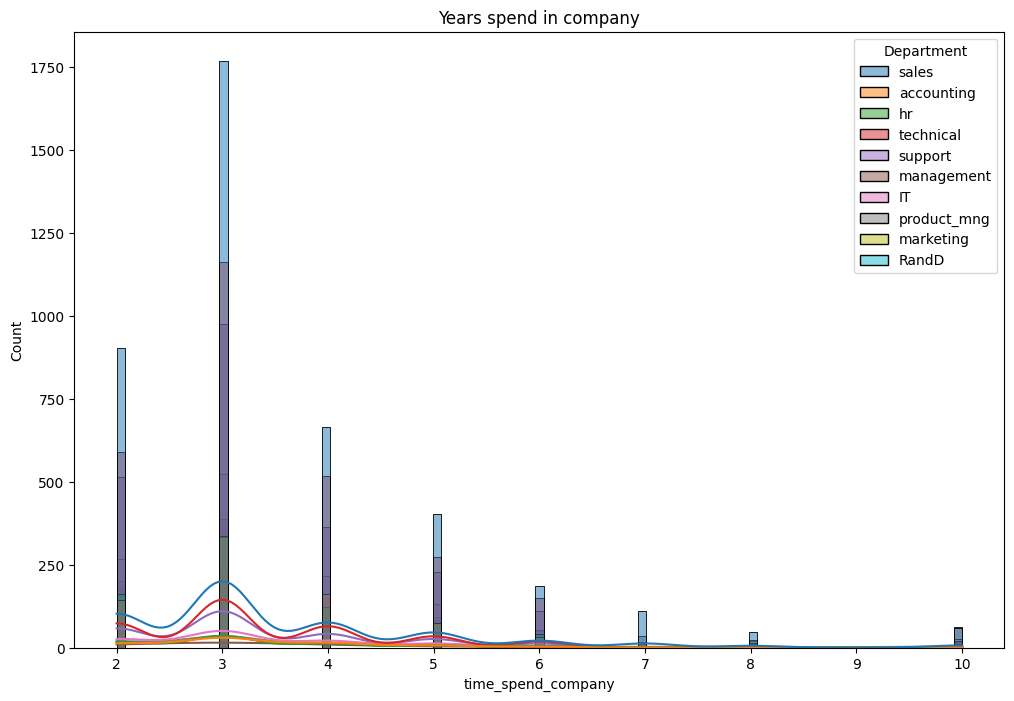

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x="time_spend_company",hue ='Department', kde=True).set(title='Years spend in company')

In [ ]:
av_years = data['time_spend_company'].mean()
print("The avarage of years spending in company is: ",av_years)

The avarage of years spending in company is:  3.498233215547703


Another usefull information is to see on what department exceed that threshold, the most of them are from management and a little above the threshold are the sales, accounting and marketing team. All them are from the economic sciences spectrum and all of the engineering spectrum left the company before the threshold

In [ ]:
mean_time_spent = data.groupby('Department')['time_spend_company'].mean().reset_index()
mean_time_spent.columns = ['Department', 'mean_time_spend_company']
mean_time_spent

def highlight_above_av_years(val):
    color = 'background-color: green' if val > av_years else ''
    return color

styled_mean_time_spent = mean_time_spent.style.applymap(highlight_above_av_years, subset=['mean_time_spend_company'])
styled_mean_time_spent

,Department,mean_time_spend_company
0,IT,3.468623
1,RandD,3.367217
2,accounting,3.522816
3,hr,3.355886
4,management,4.303175
5,marketing,3.569930
6,product_mng,3.475610
7,sales,3.534058
8,support,3.393001
9,technical,3.411397


We can also check below that the percentages of those who left the company for taking in account the salary, the promotion and the satisfaction

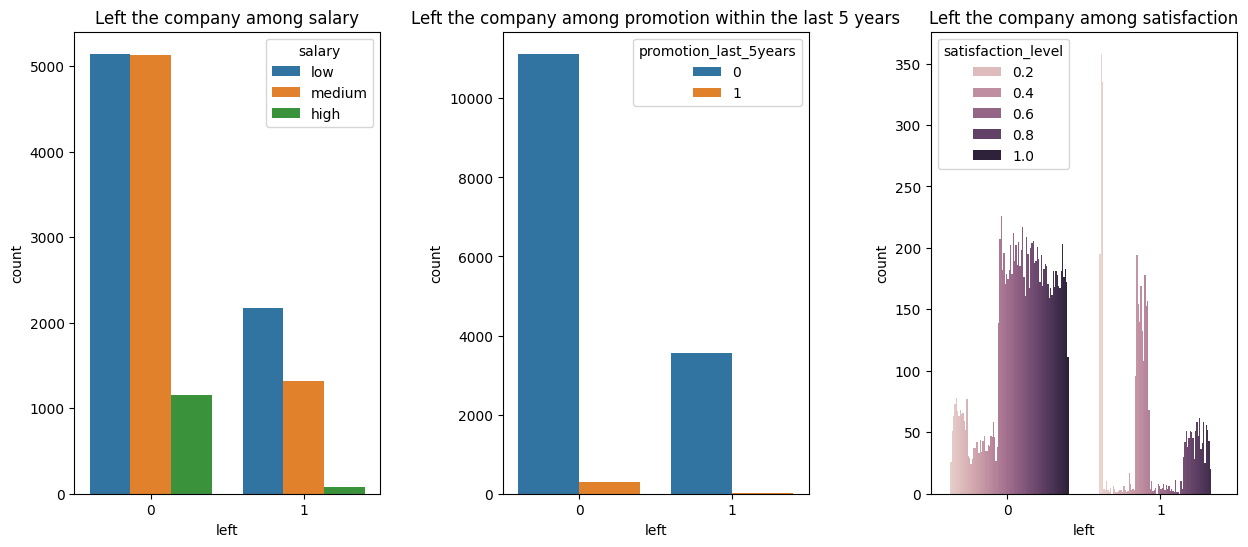

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplot(131)
sns.countplot(x="left", hue='salary', data=data)
plt.title('Left the company among salary')
plt.subplot(132)
sns.countplot(x="left", hue='promotion_last_5years', data=data)
plt.title('Left the company among promotion within the last 5 years')
plt.subplots_adjust(wspace=0.4,hspace=0.7)
plt.subplot(133)
sns.countplot(x="left", hue='satisfaction_level', data=data)
plt.title('Left the company among satisfaction')
plt.subplots_adjust(wspace=0.4,hspace=0.7)

In [ ]:
nst_ls = len(data[(data['left'] == 1) & (data['salary'] == 'low')])
nst_ms = len(data[(data['left'] == 1) & (data['salary'] == 'medium')])
nst_hs = len(data[(data['left'] == 1) & (data['salary'] == 'high')])

st_ls = len(data[(data['left'] == 0) & (data['salary'] == 'low')])
st_ms = len(data[(data['left'] == 0) & (data['salary'] == 'medium')])
st_hs = len(data[(data['left'] == 0) & (data['salary'] == 'high')])

perc_Lslr = (nst_ls*100)/st_ls
perc_Mslr = (nst_ms*100)/st_ms
perc_Hslr = (nst_hs*100)/st_hs

In [ ]:
print(f"The percentage of the one who left while had a low salary is: \033[1m{perc_Lslr:.3f}%\033[0m")
print(f"The percentage of the one who left while had a medium salary is: \033[1m{perc_Mslr:.3f}%\033[0m")
print(f"The percentage of the one who left while had a high salary is: \033[1m{perc_Hslr:.3f}%\033[0m")

The percentage of the one who left while had a low salary is: 42.224%
The percentage of the one who left while had a medium salary is: 25.678%
The percentage of the one who left while had a high salary is: 7.100%


In [ ]:
nst_prom = len(data[(data['left'] == 1) & (data['promotion_last_5years'] == 1)])
nst_Nprom = len(data[(data['left'] == 1) & (data['promotion_last_5years'] == 0)])
perc_ns = (nst_prom*100)/nst_Nprom

st_Prom = len(data[(data['left'] == 0) & (data['promotion_last_5years'] == 1)])
st_NoProm = len(data[(data['left'] == 0) & (data['promotion_last_5years'] == 0)])
perc = (st_Prom*100)/st_NoProm

df_sft = data[(data['left'] == 0)]
stf_s=df_sft['satisfaction_level'].mean() *100

df_sft = data[(data['left'] == 1)]
stf_l = df_sft['satisfaction_level'].mean() * 100

print(f"The percentage of the one who left while had a promotion is: \033[1m{perc_ns:.3f}%\033[0m")
print(f"The percentage of the one who stayed while had a promotion is: \033[1m{perc:.3f}%\033[0m")
print(f"The mean satisfaction of the one who stayed is: \033[1m{stf_s:.3f}%\033[0m")
print(f"The mean satisfaction of the one who left is: \033[1m{stf_l:.3f}%\033[0m")

The percentage of the one who left while had a promotion is: 0.535%
The percentage of the one who stayed while had a promotion is: 2.696%
The mean satisfaction of the one who stayed is: 66.681%
The mean satisfaction of the one who left is: 44.010%


It's clear that if the satisfaction is bellow 50% the the person will likely leave the company

#3 Question about satisfaction

Checking the satisfaction between the departments we can see that the mean value and the destibution are close for every department except from the destibution of management.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'sales'),
  Text(1, 0, 'accounting'),
  Text(2, 0, 'hr'),
  Text(3, 0, 'technical'),
  Text(4, 0, 'support'),
  Text(5, 0, 'management'),
  Text(6, 0, 'IT'),
  Text(7, 0, 'product_mng'),
  Text(8, 0, 'marketing'),
  Text(9, 0, 'RandD')])

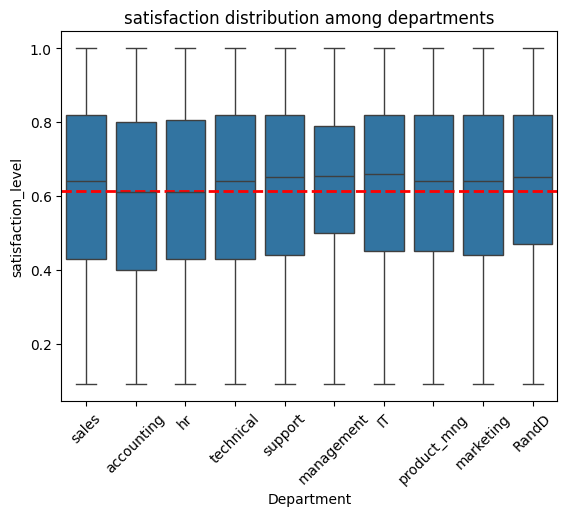

In [ ]:
sns.boxplot(x=data.Department, y=data.satisfaction_level)
plt.axhline(data.satisfaction_level.mean(),color='r',linestyle='dashed',linewidth=2)
plt.title('satisfaction distribution among departments')
plt.xticks(rotation=45)

In [ ]:
av_satisfaction = data['satisfaction_level'].mean()
print("The avarage of years spending in company is: ",av_satisfaction)

The avarage of years spending in company is:  0.6128335222348156


In [ ]:
mean_satisfaction = data.groupby('Department')['satisfaction_level'].mean().reset_index()
mean_satisfaction.columns = ['Department', 'mean_satisfaction']
mean_satisfaction

def highlight_above_av_satisfaction(val_s):
    color = 'background-color: green' if val_s > av_satisfaction else ''
    return color

styled_mean_satisfaction = mean_satisfaction.style.applymap(highlight_above_av_satisfaction, subset=['mean_satisfaction'])
styled_mean_satisfaction

,Department,mean_satisfaction
0,IT,0.618142
1,RandD,0.619822
2,accounting,0.582151
3,hr,0.598809
4,management,0.621349
5,marketing,0.618601
6,product_mng,0.619634
7,sales,0.614447
8,support,0.618300
9,technical,0.607897


A work accident has a crucial role for the satisfaction, after all helth cames first and watching the plot below we can assume that the company cares for the employs that had a work accident, the mean value for the is higher from those that do not have and we can check the there is a great probability on those who did not have an accident to be unsatisfied

Text(0.5, 1.0, 'Satisfaction distribution among working hours along with accidents')

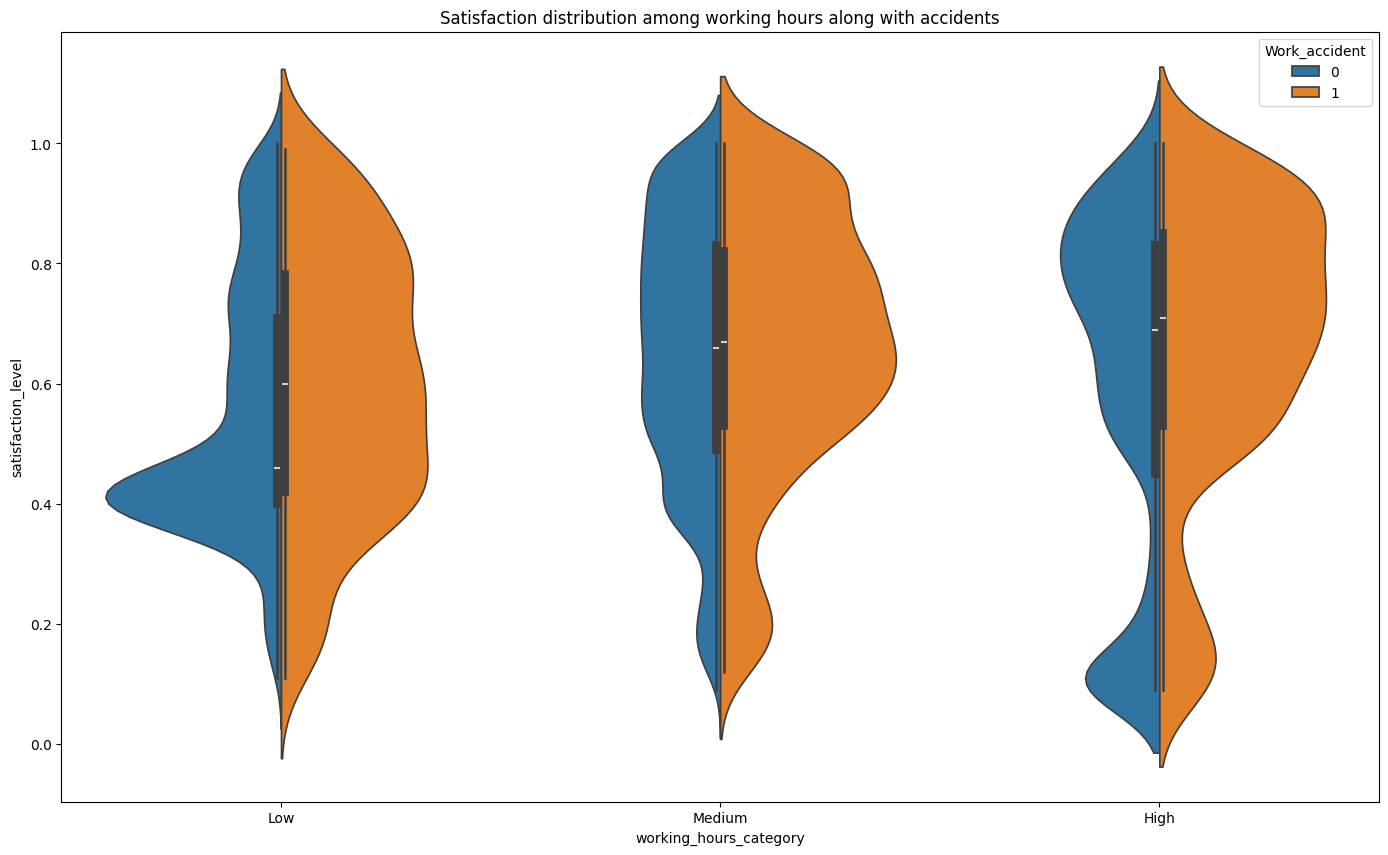

In [ ]:
data['working_hours_category'] = pd.cut(data['average_montly_hours'], bins=[0, 150, 220, 350], labels=[ 'Low', 'Medium', 'High'])
plt.figure(figsize=(17, 10))
sns.violinplot(x="working_hours_category",y="satisfaction_level", hue="Work_accident", data=data,split=True)
plt.title('Satisfaction distribution among working hours along with accidents')

Foe the last graprh we see a box plot of satisfaction by number of projects. It is clear that the employs with more that5 projects tends to be unhappy. We can assume that there is too much work for them, the company may take into consideration to onload some work from them. We can also see that employs that only 2 projects tends to be unhappy, we can assume that those are really hard projects or we can assume also that being in two projects only those employs feel that the company do not believe on them or that they do not have enough hours to work and so the salary is less.

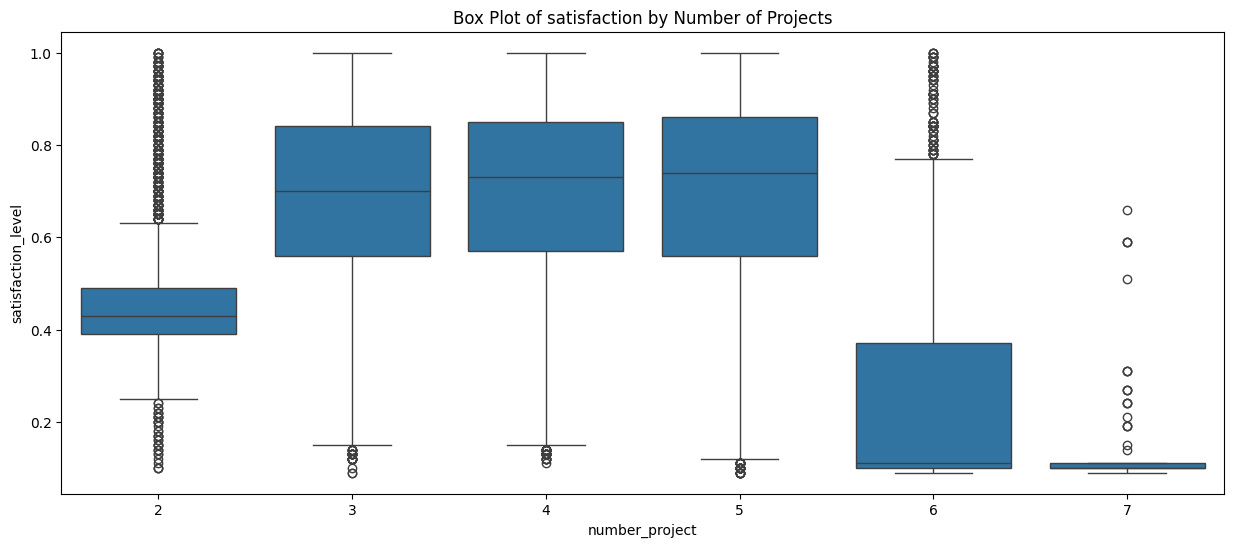

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=data, x='number_project', y='satisfaction_level')
plt.title('Box Plot of satisfaction by Number of Projects')
plt.show()